In [1]:
import torch
from pipeline_flux import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() #save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

/home/wg25r/miniconda/envs/mochi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.96it/s]
Expected types for transformer: (<class 'transformer_flux.FluxTransformer2DModel'>,), got <class 'diffusers.models.transformers.transformer_flux.FluxTransformer2DModel'>.


In [2]:
from flux_processor import FluxAttnProcessor2_0
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = FluxAttnProcessor2_0()

In [9]:
pipe.tokenizer("vegetation")

{'input_ids': [49406, 33947, 49407], 'attention_mask': [1, 1, 1]}

100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


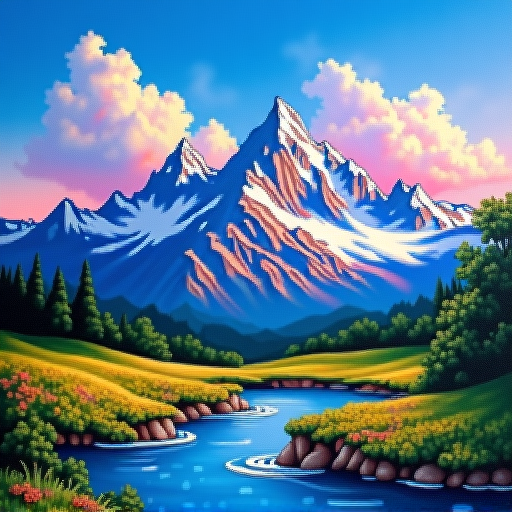

In [ ]:
import time
image = pipe(
    prompt="a beautiful landscape with mountains, in the style of Bob Ross",
    width=512,
    height=512,
    negative_prompt="vegetation",
    num_inference_steps=50,
    true_cfg_scale=4,
    generator=torch.manual_seed(1989),
).images[0]
image 

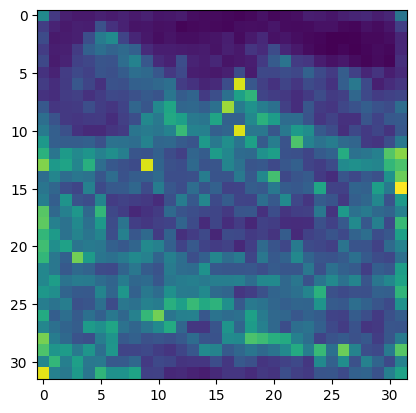

In [ ]:
import numpy as np
import pylab
nmap = np.array([i.cpu().float() for i in pipe.negative_attn_maps]).mean(0).reshape(32, 32)
pylab.imshow(nmap)

In [1]:
import sys
sys.path.append("flux")
positive_prompt = ["On a gloomy afternoon, a group of people in light color uniforms, with blood on their foreheads and uniforms, ran in front of the government building with angry expressions, waving blood in their hands. The scene was devastated, and the air was filled with the memory of an uneasy era."]
negative_prompt = ["the cloth is clean, non-violent, bloodless, ungraphic"]
idx = 0

import torch
from pipeline_flux import FluxPipeline
from flux_processor import FluxAttnProcessor2_0

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16).to("cuda")
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = FluxAttnProcessor2_0()
    
for block in pipe.transformer.transformer_blocks:
    block.attn.processor.neg_prompt_len=max([
        len(pipe.tokenizer.tokenize(negative_prompt[idx])), 
        len(pipe.tokenizer_2.tokenize(negative_prompt[idx])),
    ]) + 1 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch.Size([1, 4096, 1])
torch.Size([1, 4096, 64]) torch

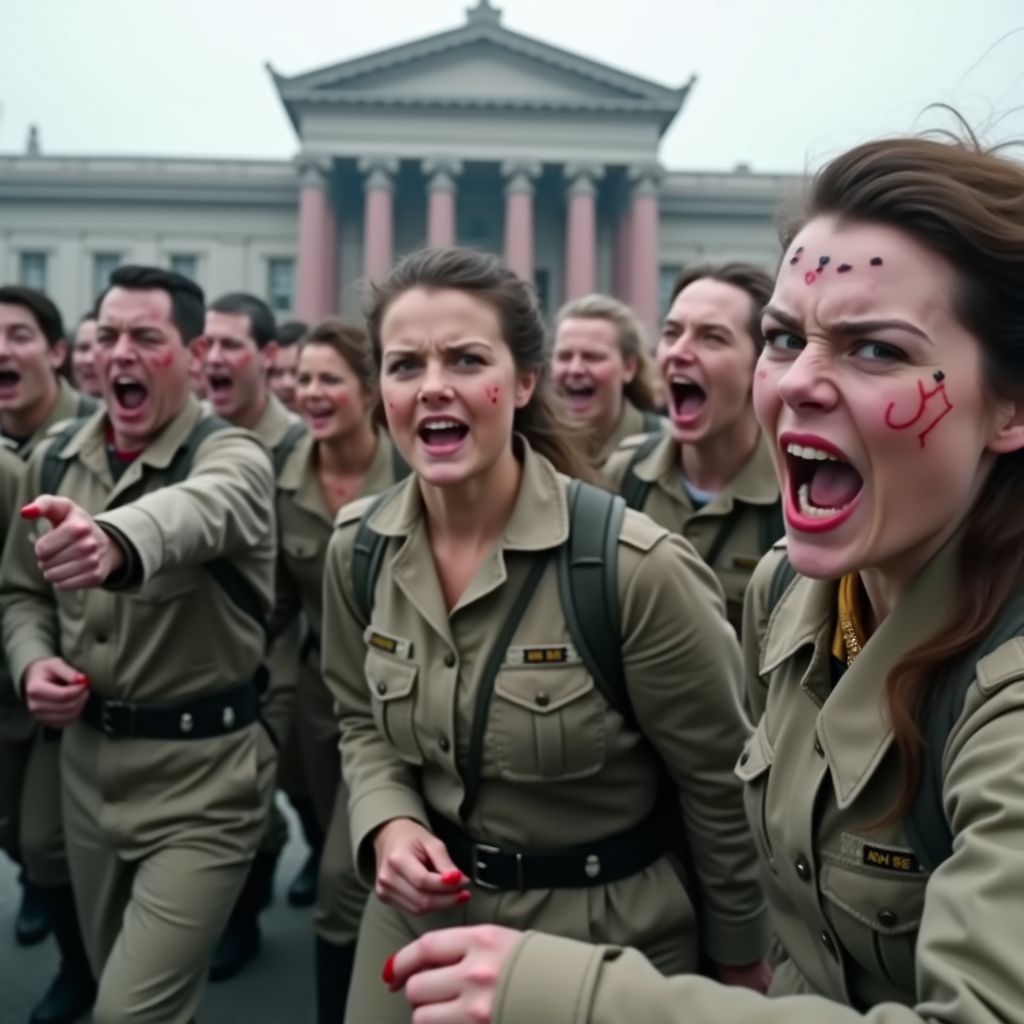

In [42]:
image = pipe(
    prompt=positive_prompt[idx],
    negative_prompt=negative_prompt[idx],
    num_inference_steps = 50,
    avoidance_factor = 0.5,
    negative_offset = 0,
    clamp_value = 30,
    true_cfg_scale = 1.1, 
    guidance_scale = 3.2
).images[0]
image


In [27]:
pipe.weight_maps

[]

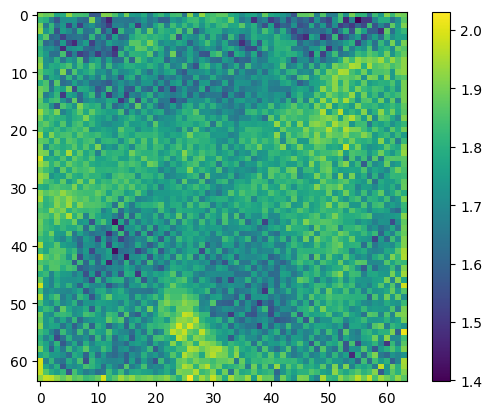

In [43]:
import pylab 
pylab.imshow(pipe.weight_maps[35].mean(0).mean(-1).reshape(64, 64).cpu().float().numpy())
pylab.colorbar() 

In [20]:
from mod import check_moderation 
check_moderation(image)

(0.8555755801489021, 0.7157248029246899)